# Dask DataFrame

Материалы: 
* Макрушин С.В. Лекция 13: Dask DataFrame
* https://docs.dask.org/en/latest/dataframe.html
* Jesse C. Daniel. Data Science with Python and Dask. 

## Задачи для совместного разбора

1. Считать данные из файлов в каталоге `accounts`. Содержат ли какие-либо из столбцов пропуски?

In [1]:
import dask.dataframe as dd

In [2]:
accounts = dd.read_csv('./data/accounts/accounts.*.csv',
                      dtype={'amount':'float64',
                            'id':'int64',
                            'names':'object'})
accounts

,id,names,amount
npartitions=3,,,
,int64,object,float64
,...,...,...
,...,...,...
,...,...,...


In [3]:
accounts.isna().sum().compute()

id        0
names     0
amount    3
dtype: int64

2. Подсчитать количество раз, которое то или иное имя встретилось в выборке. Вывести самое часто встречающееся имя.

In [4]:
%%time
accounts['names'].value_counts().compute()

CPU times: user 1.27 s, sys: 264 ms, total: 1.54 s
Wall time: 941 ms


Norbert     188147
Alice       185892
George      183249
Tim         162432
Bob         157065
Michael     148372
Ingrid      132067
Oliver      121907
Quinn       118071
Wendy       110657
Charlie     109236
Ursula      108745
Hannah      108632
Ray         108610
Sarah       104781
Victor      102656
Frank        99984
Laura        97216
Jerry        96378
Xavier       94445
Edith        89991
Zelda        89047
Kevin        84784
Dan          73293
Patricia     62881
Yvonne       61462
Name: names, dtype: int64

In [5]:
%%time
accounts.groupby('names')['amount'].sum().compute()

CPU times: user 1.19 s, sys: 264 ms, total: 1.45 s
Wall time: 801 ms


names
Alice       121135049.0
Bob         134707661.0
Charlie     190678161.0
Dan          67436523.0
Edith        94317280.0
Frank       132918185.0
George      171385330.0
Hannah      134076218.0
Ingrid      162441094.0
Jerry        49464228.0
Kevin        92375351.0
Laura       193055407.0
Michael     392087039.0
Norbert     142008672.0
Oliver       48824444.0
Patricia     58811563.0
Quinn       145487072.0
Ray          54871516.0
Sarah        83719740.0
Tim         165616261.0
Ursula       36921307.0
Victor       77636440.0
Wendy        86795738.0
Xavier      168807871.0
Yvonne       24933113.0
Zelda        62402294.0
Name: amount, dtype: float64

In [6]:
accounts.groupby('names')['amount'].mean().compute()

names
Alice        651.642077
Bob          857.655499
Charlie     1745.577526
Dan          920.095002
Edith       1048.074585
Frank       1329.394553
George       935.259292
Hannah      1234.223967
Ingrid      1229.990035
Jerry        513.231526
Kevin       1089.550393
Laura       1985.839851
Michael     2642.594553
Norbert      754.775107
Oliver       400.505664
Patricia     935.283520
Quinn       1232.199880
Ray          505.220709
Sarah        798.997337
Tim         1019.603656
Ursula       339.521881
Victor       756.277665
Wendy        784.367351
Xavier      1787.366944
Yvonne       405.667128
Zelda        700.779296
Name: amount, dtype: float64

In [7]:
import dask

In [8]:
%%time
dask.compute(accounts.groupby('names')['amount'].sum(),
            accounts.groupby('names')['amount'].mean())

CPU times: user 1.46 s, sys: 337 ms, total: 1.8 s
Wall time: 1.04 s


(names
 Alice       121135049.0
 Bob         134707661.0
 Charlie     190678161.0
 Dan          67436523.0
 Edith        94317280.0
 Frank       132918185.0
 George      171385330.0
 Hannah      134076218.0
 Ingrid      162441094.0
 Jerry        49464228.0
 Kevin        92375351.0
 Laura       193055407.0
 Michael     392087039.0
 Norbert     142008672.0
 Oliver       48824444.0
 Patricia     58811563.0
 Quinn       145487072.0
 Ray          54871516.0
 Sarah        83719740.0
 Tim         165616261.0
 Ursula       36921307.0
 Victor       77636440.0
 Wendy        86795738.0
 Xavier      168807871.0
 Yvonne       24933113.0
 Zelda        62402294.0
 Name: amount, dtype: float64,
 names
 Alice        651.642077
 Bob          857.655499
 Charlie     1745.577526
 Dan          920.095002
 Edith       1048.074585
 Frank       1329.394553
 George       935.259292
 Hannah      1234.223967
 Ingrid      1229.990035
 Jerry        513.231526
 Kevin       1089.550393
 Laura       1985.839851
 Mich

3. Создать новую колонку, которая является результатом от деления значения `amount` нацело на 100, если `amount` > 100, и нулём в противном случае.

In [9]:
def f(x):
    if x > 100:
        return x // 100
    return 0

accounts['new_column'] = accounts['amount'].map(f)
accounts.head()

,id,names,amount,new_column
0,39,Victor,205.0,2.0
1,289,Hannah,87.0,0.0
2,234,Victor,1820.0,18.0
3,155,Ray,-600.0,0.0
4,266,Ray,572.0,5.0


## Лабораторная работа 13

__При решении данных задач не подразумевается использования других коллекций, кроме `dask.DataFrame`, если в задании явно не указано обратное.__

In [10]:
import dask.dataframe as dd
import pandas as pd
import dask.bag as db
import json
import dask

1. В архиве `recipes_full.zip` находятся файлы, содержащие информацию об рецептах блюд. Загрузите данные из файлов этого архива в виде `dd.DataFrame` с названием `recipes`. Укажите, что в столбце `submitted` содержатся даты.

In [11]:
recipes = dd.read_csv('./data/recipes_full/recipes_full_*.csv', 
                      parse_dates=['submitted'], 
                      dtype={'minutes': 'float64', 'n_steps': 'float64'})

2. Выведите метаинформацию о таблице: `npartitions` и типы столбцов.

In [12]:
recipes

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
npartitions=16,,,,,,,,
,int64,object,float64,int64,datetime64[ns],float64,object,int64
,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...


In [13]:
# на всякий случай

In [14]:
recipes.npartitions #кол-во частей

16

In [15]:
recipes.info() # типы данных

<class 'dask.dataframe.core.DataFrame'>
Columns: 8 entries, id to n_ingredients
dtypes: datetime64[ns](1), object(2), float64(2), int64(3)

3. Выведите на экран 5 первых строк таблицы. Выведите на экран 5 последних строк таблицы. В случае сообщения об ошибки объясните причину и исправьте ошибку.

some problems are "due to dask's dtype inference failing"
поэтому мануально добавляем 

dtype={'minutes': 'float64',
       'n_steps': 'float64'}
(добавила раннее)

In [16]:
recipes.head()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33.0,803776,2019-08-22,4.0,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23.0,51579,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0.0,68884,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24.0,678862,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47.0,489552,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10


In [17]:
recipes.tail()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
44011,1029131,tuti waffle snackies steakhouse,19.0,171345,1973-10-18,4.0,"according to a providence journal article, ama...",4
44012,1700703,noelias cheats crocante fleisch zitumbuwa,1.0,30228,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1
44013,1910650,rubbed restuffed pelmeni bedouin flavourful,60.0,591905,2009-09-26,3.0,another great recipe to add to the growing swe...,2
44014,713836,stems polpettine peezi,NaN,357389,2003-09-30,4.0,adapted from top secret recipes. love this!,9
44015,660699,clementines,64.0,29196,1973-06-03,6.0,this would make a great start to your holiday ...,8


4. Посчитайте, сколько строк содержит каждый из блоков (partitions).

In [18]:
recipes.map_partitions(len).compute()

0     237505
1      41450
2     235222
3      43733
4     238139
5      40816
6     234750
7      44205
8     237887
9      41068
10    234486
11     44468
12    238298
13     40656
14    234938
15     44016
dtype: int64

In [19]:
# частичная проверка что действительно все верно и все правильно считает

In [20]:
recipes.npartitions #number of chunks

16

In [21]:
recipes.partitions[0].count().compute()  #number of or rows of chunk 0 

id                237505
name              237503
minutes           237505
contributor_id    237505
submitted         237505
n_steps           237505
description       232482
n_ingredients     237505
dtype: int64

In [22]:
recipes.partitions[1].count().compute() #number of or rows of chunk 1 

id                41450
name              41449
minutes           41450
contributor_id    41450
submitted         41450
n_steps           41450
description       40617
n_ingredients     41450
dtype: int64

5. Найдите максимум в столбце `n_steps`. Визуализируйте граф вычислений для этой задачи. Прокомментируйте логику работы `dask` при решении данной задачи.

In [23]:
recipes.n_steps.max().compute()

145.0

In [24]:
# !pip install graphviz

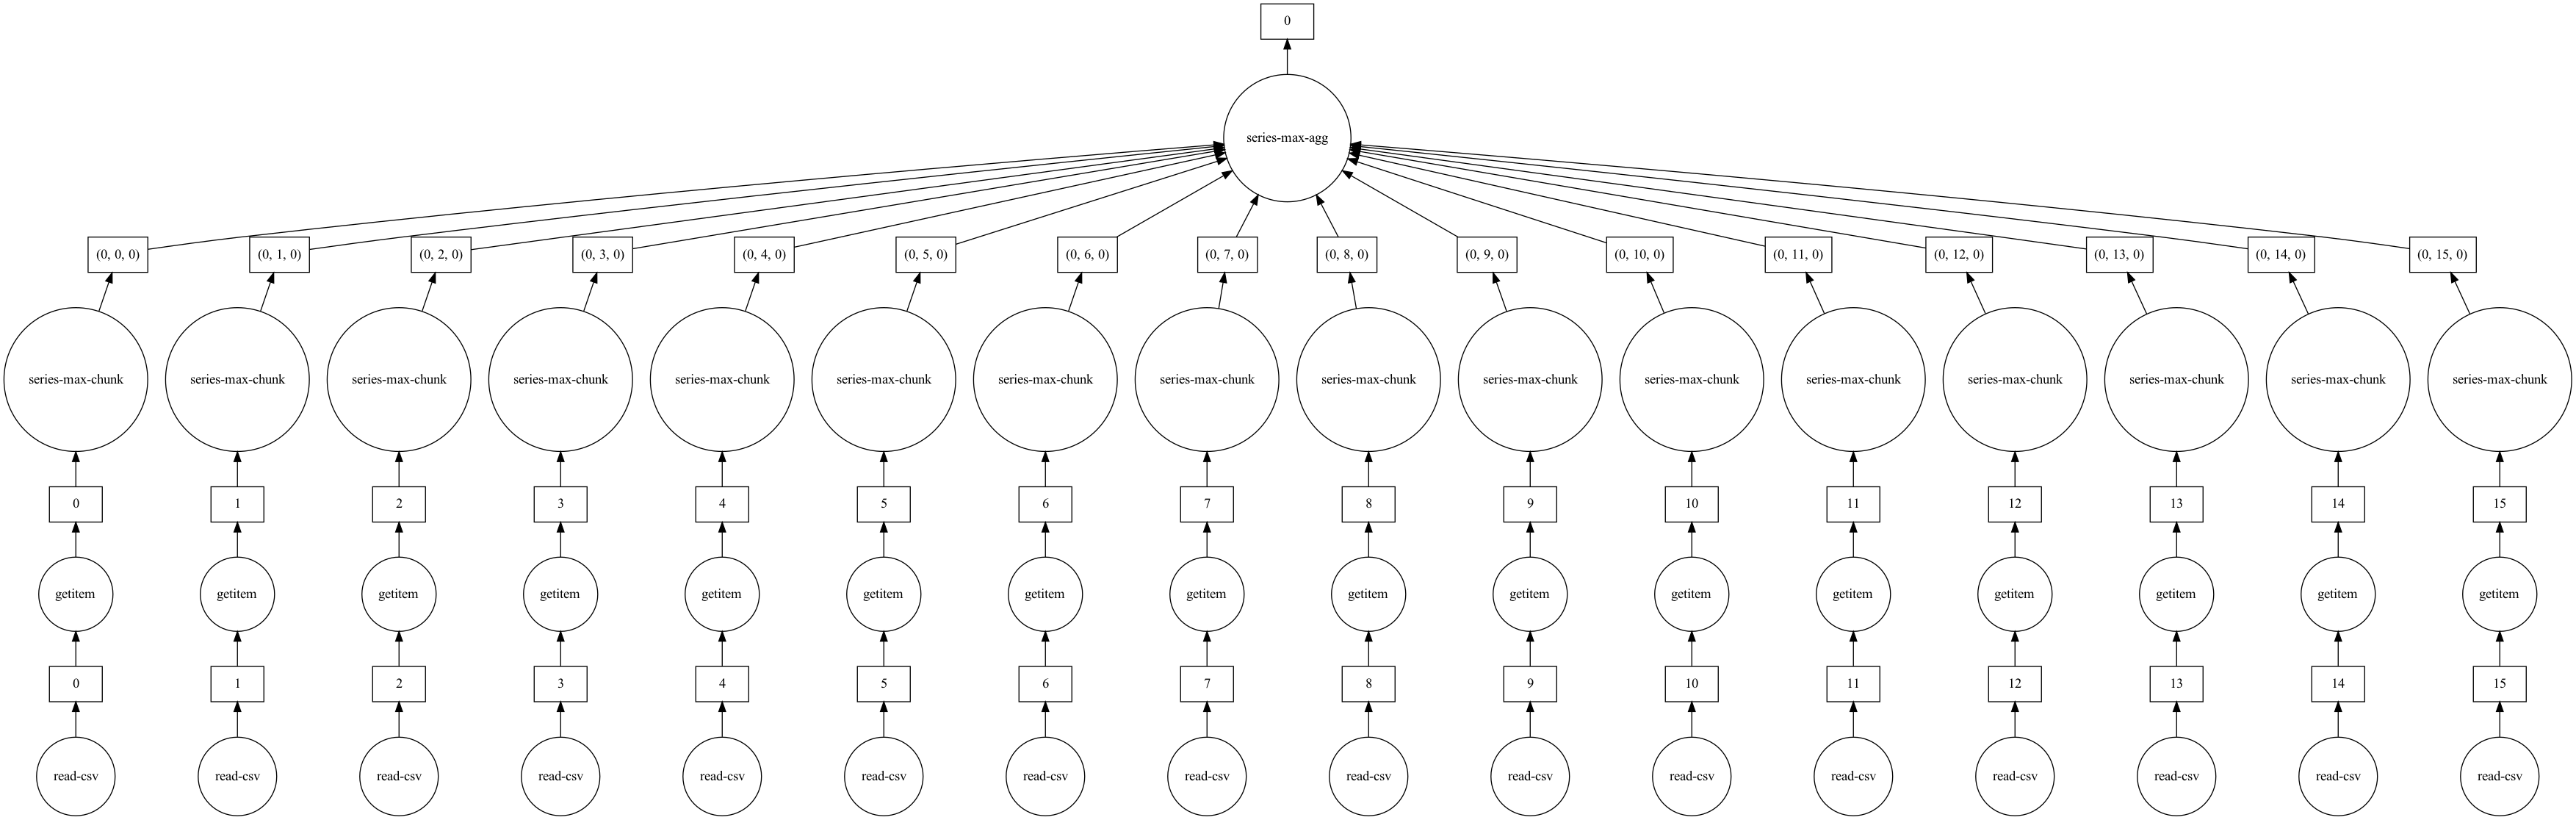

In [25]:
recipes.n_steps.max().visualize()

dask, согласно partition (в нашем случае, 16), ищет в каждом их этих кусочков максимальное значение. Затем аггрегирует этот результат, находя их этих наибольшиъ значений "самое наибольшее"

6. Посчитайте количество рецептов с группировкой по месяцам добавления отзыва в базу.

In [26]:
recipes_count = recipes.groupby(recipes.submitted.dt.strftime('%m')).id.count().compute()

In [27]:
recipes_count

submitted
01    193363
02    173834
03    192389
04    186049
05    192487
06    184205
07    189337
08    187276
09    181081
10    187018
11    180974
12    183624
Name: id, dtype: int64

7. Считайте файлы из архива `reviews_full.zip` (__ЛР12__) в виде `dask.bag`. Пользуясь результатом лабораторной работы 12, рассчитайте среднее значение оценок отзывов с группировкой по месяцам. После завершения всех вычислений преобразуйте результат к `pd.Series`.

In [28]:
def add_rating_n_month(json_string):
    res = json.loads(json_string[0])
    res.update({'rating':int(json_string[1][-6])})
    res.update({'month':res['date'][5:7]})
    return res

In [29]:
reviews = db.read_text('../sem12/data/reviews_full/reviews_*.json', include_path=True).map(add_rating_n_month)
reviews.take(2)

({'user_id': 452355,
  'recipe_id': 292657,
  'date': '2016-05-08',
  'review': 'WOW!!! This is the best. I have never been able to make homemade enchiladas that taste like the Mexican restaurants. I made this last night for my family and they said they will never have enchiladas at the Mexican Restaurants again. Thanks for sharing.',
  'rating': 0,
  'month': '05'},
 {'user_id': 329304,
  'recipe_id': 433404,
  'date': '2006-06-14',
  'review': 'This was good but the dressing needed something and I found it to be a little too sweet, next time I will experiment with some garlic and herbs and reduce the sugar slightly, thanks for sharing kcdlong!...Kitten',
  'rating': 0,
  'month': '06'})

In [30]:
def binop_sum(total, value):
    return total + value['rating']

def combine_sum(left, right):
    return left + right

res_7_1 = reviews.foldby(lambda var: var['month'], binop_sum, 0, combine_sum, 0).compute()

In [31]:
res_7_1 # сумма всех элементов

[('05', 3443183),
 ('06', 3425742),
 ('11', 3190996),
 ('09', 3132019),
 ('10', 3270977),
 ('04', 3324346),
 ('02', 3094351),
 ('03', 3410689),
 ('12', 3320539),
 ('01', 3416161),
 ('07', 3559810),
 ('08', 3362237)]

In [32]:
res_7_2 = reviews.pluck('month').frequencies().compute()

In [33]:
res_7_2 # их кол-во

[('05', 779812),
 ('06', 775332),
 ('11', 723774),
 ('09', 710102),
 ('10', 741474),
 ('04', 753434),
 ('02', 702123),
 ('03', 773941),
 ('12', 753485),
 ('01', 774894),
 ('07', 806899),
 ('08', 762270)]

In [34]:
lists = list(map((lambda x, y: {x[0]:x[1] / y[1]}), res_7_1, res_7_2))
dd = dict((key, val) for k in lists for key, val in k.items())
mean_rating = pd.Series(dd)

In [35]:
mean_rating # сумма, поделенная на количество

05    4.415401
06    4.418419
11    4.408829
09    4.410661
10    4.411452
04    4.412259
02    4.407135
03    4.406911
12    4.406908
01    4.408553
07    4.411717
08    4.410822
dtype: float64

8. Пользуясь результатами решения задач 6 и 7, создайте `pd.DataFrame`, содержащий два столбца: `mean_rating`, `recipes_count`

In [36]:
final = pd.DataFrame(mean_rating, columns=['mean_rating'])
final['recipes_count'] = recipes_count

In [37]:
final

,mean_rating,recipes_count
05,4.415401,192487
06,4.418419,184205
11,4.408829,180974
09,4.410661,181081
10,4.411452,187018
04,4.412259,186049
02,4.407135,173834
03,4.406911,192389
12,4.406908,183624
01,4.408553,193363


In [38]:
final.columns

Index(['mean_rating', 'recipes_count'], dtype='object')